# P2: DESEQ analysis

In [1]:
# Load required libraries
library("DESeq2")
library("gplots")
library("RColorBrewer")
library("genefilter")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [2]:
# Read sample information
sampleInfo <- read.table("/pub/mbarcen1/EE283/hw7/shortRNAseq.txt", header = TRUE)
sampleInfo$FullSampleName <- as.character(sampleInfo$FullSampleName)



In [3]:
# Read count data
countdata <- read.table("/pub/mbarcen1/EE283/RNAseq/counts/fly_counts.txt", header = TRUE, row.names = 1)

# Remove first five columns (chr, start, end, strand, length)
countdata <- countdata[, 6:ncol(countdata)]

# Clean up column names in countdata
colnames(countdata) <- gsub("RNAseq.output.", "", colnames(countdata))
colnames(countdata) <- gsub(".sorted.bam", "", colnames(countdata))

# Check if column names match
print(cbind(colnames(countdata), sampleInfo$FullSampleName, colnames(countdata) == sampleInfo$FullSampleName))



      [,1]        [,2]      [,3]   
 [1,] "21148_B_0" "21148B0" "FALSE"
 [2,] "21286_B_0" "21286B0" "FALSE"
 [3,] "22162_B_0" "22162B0" "FALSE"
 [4,] "21297_B_0" "21297B0" "FALSE"
 [5,] "21029_B_0" "21029B0" "FALSE"
 [6,] "22052_B_0" "22052B0" "FALSE"
 [7,] "22031_B_0" "22031B0" "FALSE"
 [8,] "21293_B_0" "21293B0" "FALSE"
 [9,] "22378_B_0" "22378B0" "FALSE"
[10,] "22390_B_0" "22390B0" "FALSE"
[11,] "21148_E_0" "21148E0" "FALSE"
[12,] "21286_E_0" "21286E0" "FALSE"
[13,] "22162_E_0" "22162E0" "FALSE"
[14,] "21297_E_0" "21297E0" "FALSE"
[15,] "21029_E_0" "21029E0" "FALSE"
[16,] "22052_E_0" "22052E0" "FALSE"
[17,] "22031_E_0" "22031E0" "FALSE"
[18,] "21293_E_0" "21293E0" "FALSE"
[19,] "22378_E_0" "22378E0" "FALSE"
[20,] "22390_E_0" "22390E0" "FALSE"


In [4]:
# Create DESeq2 object and run DESeq
dds <- DESeqDataSetFromMatrix(countData = countdata, colData = sampleInfo, design = ~TissueCode)
dds <- DESeq(dds)
res <- results(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 39 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [5]:
# Basic results and plots
print(res)
pdf("MA_plot.pdf")
plotMA(res, ylim = c(-1, 1))
dev.off()

log2 fold change (MLE): TissueCode E vs B 
Wald test p-value: TissueCode E vs B 
DataFrame with 17490 rows and 6 columns
              baseMean log2FoldChange     lfcSE      stat      pvalue
             <numeric>      <numeric> <numeric> <numeric>   <numeric>
FBgn0031081  15.279706        1.68400  0.276353  6.093663 1.10356e-09
FBgn0052826   0.000000             NA        NA        NA          NA
FBgn0031085   0.506121        2.22524  1.863159  1.194338 2.32346e-01
FBgn0062565   0.000000             NA        NA        NA          NA
FBgn0031088   0.714164       -1.01460  1.499486 -0.676631 4.98640e-01
...                ...            ...       ...       ...         ...
FBgn0031309   6.986254      -1.177666  0.426803  -2.75927 5.79298e-03
FBgn0031305   5.869585      -5.860629  0.711083  -8.24184 1.69582e-16
FBgn0016926 187.004165      -2.438142  0.146507 -16.64183 3.46860e-62
FBgn0031299   0.819516      -2.171507  1.135388  -1.91257 5.58035e-02
FBgn0003310 137.760223       0.357511  

png 
  2

In [6]:
pdf("Dispersion_plot.pdf")
plotDispEsts(dds)
dev.off()

png 
  2

In [7]:
pdf("p_value_histogram.pdf")
hist(res$pvalue, breaks = 20, col = "grey")
dev.off()



png 
  2

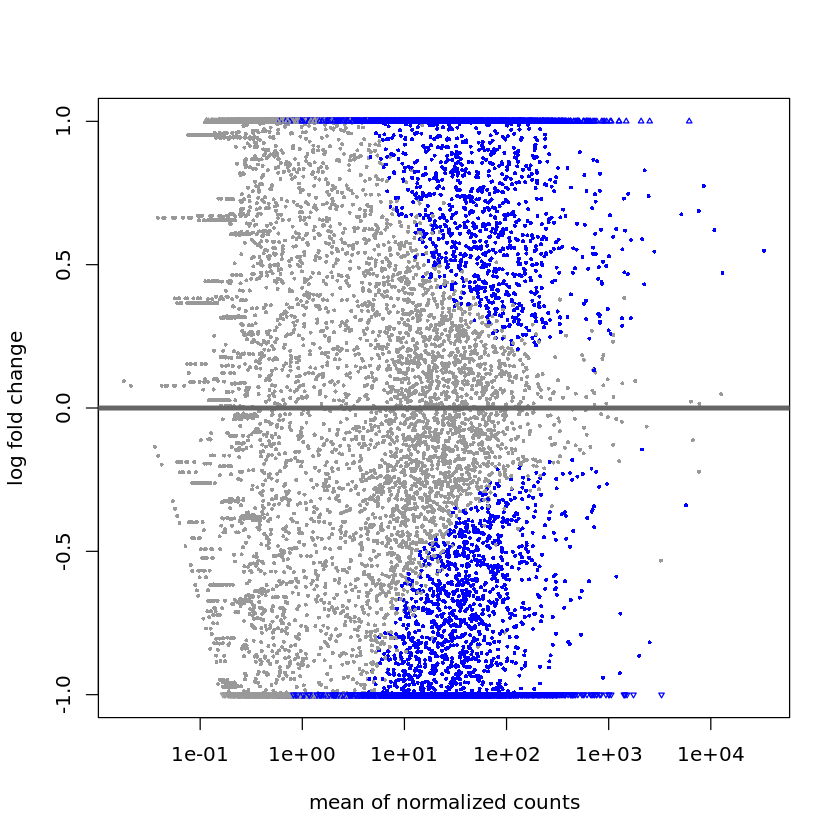

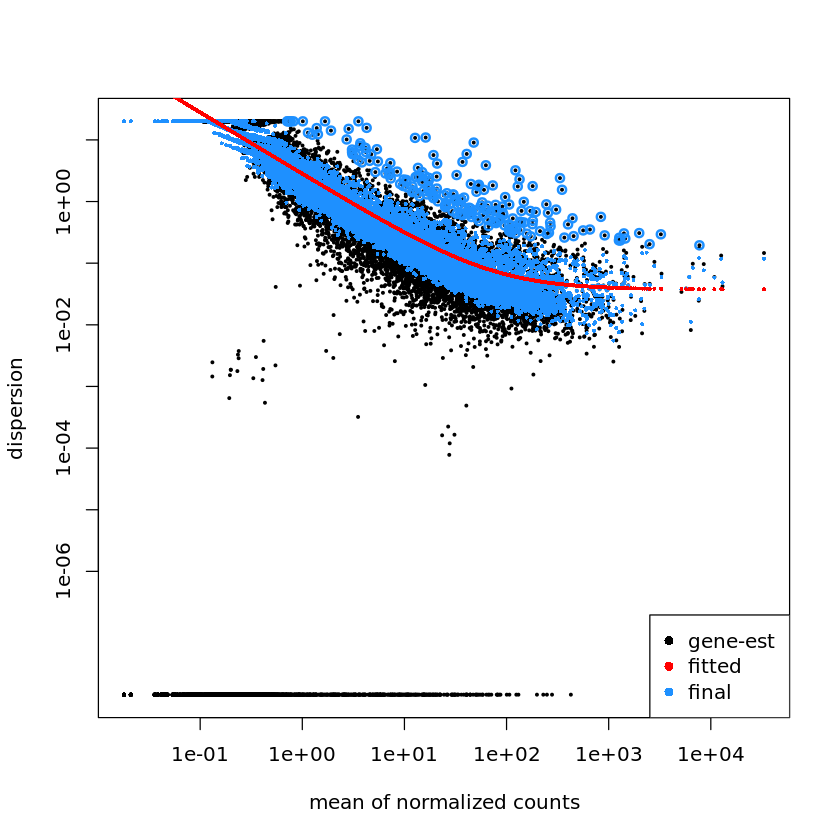

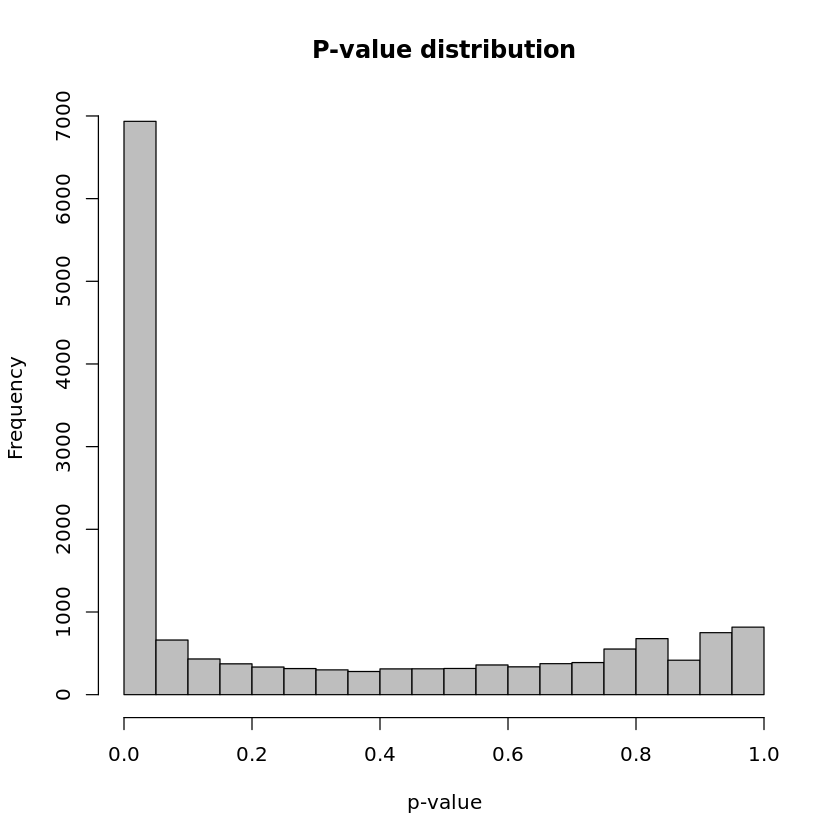

In [8]:
# MA Plot
plotMA(res, ylim = c(-1, 1))

# Dispersion Plot
plotDispEsts(dds)

# P-value histogram
hist(res$pvalue, breaks = 20, col = "grey", main = "P-value distribution", xlab = "p-value")

In [9]:
# Log transform
rld <- rlog(dds)

# Sample distance heatmap
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- rld$TissueCode
colnames(sampleDistMatrix) <- NULL
colours <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)



In [10]:
pdf("sample_distance_heatmap.pdf")
heatmap.2(sampleDistMatrix, trace = "none", col = colours)
dev.off()



png 
  2

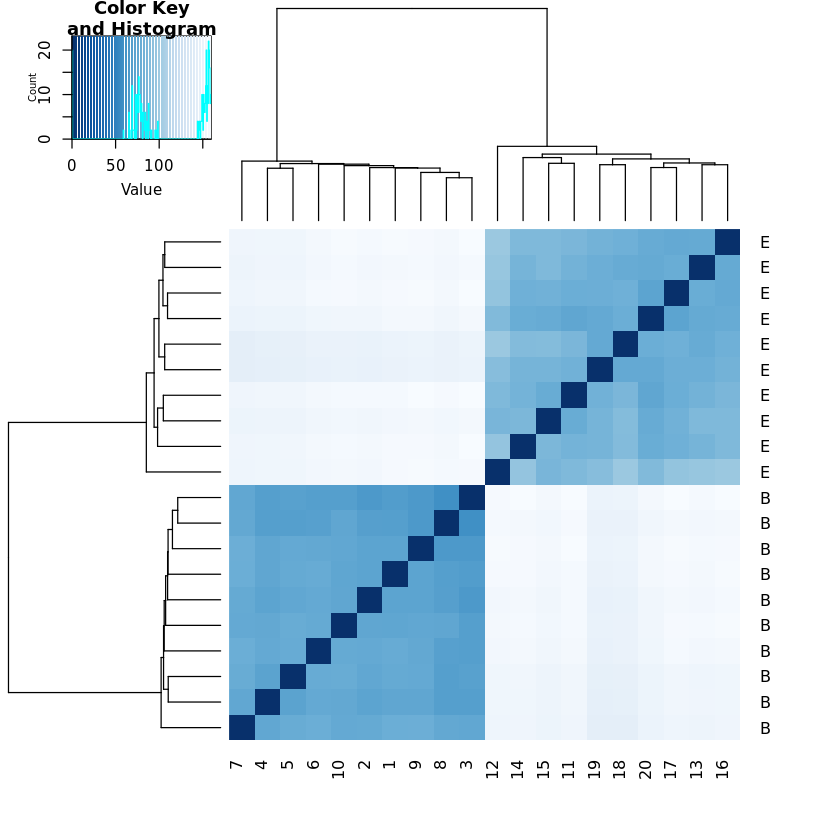

In [12]:
heatmap.2(sampleDistMatrix, trace = "none", col = colours)

In [11]:
# PCA plot
pdf("PCA_plot.pdf")
print(plotPCA(rld, intgroup = "TissueCode"))
dev.off()



png 
  2

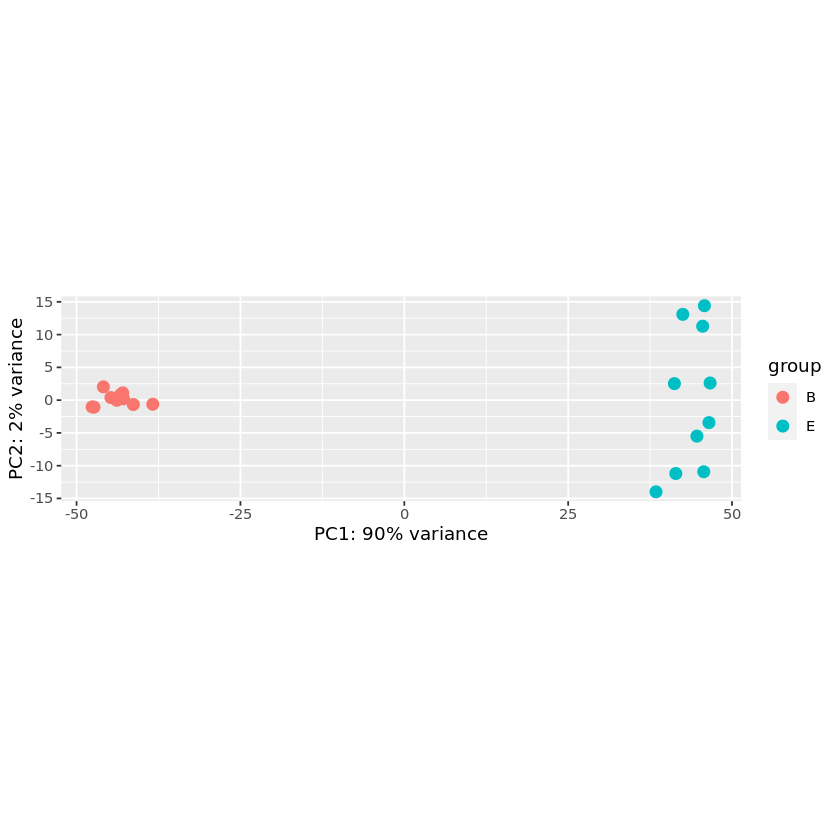

In [13]:
print(plotPCA(rld, intgroup = "TissueCode"))

In [14]:
# Heatmap of top variable genes
topVarGenes <- head(order(rowVars(assay(rld)), decreasing = TRUE), 35)

pdf("top_variable_genes_heatmap.pdf")
heatmap.2(assay(rld)[topVarGenes, ], scale = "row", trace = "none", 
          dendrogram = "column", col = colorRampPalette(rev(brewer.pal(9, "RdBu")))(255))
dev.off()



png 
  2

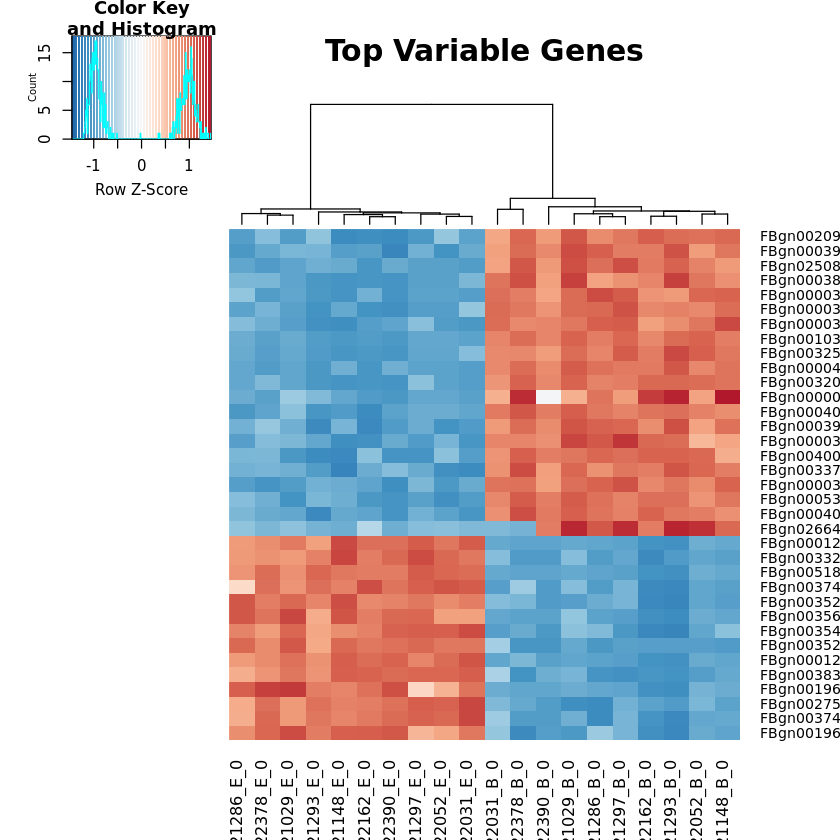

In [15]:
heatmap.2(assay(rld)[topVarGenes, ], scale = "row", trace = "none", 
          dendrogram = "column", col = colorRampPalette(rev(brewer.pal(9, "RdBu")))(255),
          main = "Top Variable Genes")

# P3: Volcano plot

In [16]:
# Volcano plot
pdf("volcano_plot.pdf")
with(res, plot(log2FoldChange, -log10(pvalue), pch = 20, main = "Volcano plot", xlim = c(-3, 3)))
with(subset(res, padj < 0.1), points(log2FoldChange, -log10(pvalue), pch = 20, col = "red"))
dev.off()

# Write results to file
write.csv(as.data.frame(res), file = "DESeq2_results.csv")

# Extract normalized counts
normalized_counts <- counts(dds, normalized = TRUE)
write.csv(normalized_counts, file = "normalized_counts.csv")

png 
  2

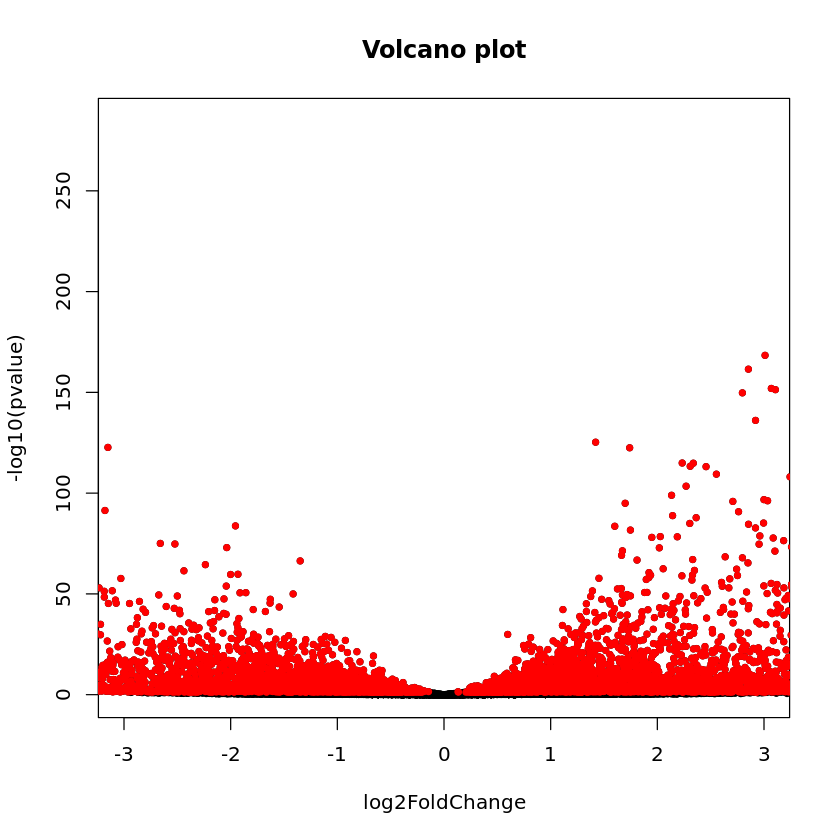

In [17]:
# Volcano plot
with(res, plot(log2FoldChange, -log10(pvalue), pch = 20, main = "Volcano plot", xlim = c(-3, 3)))
with(subset(res, padj < 0.1), points(log2FoldChange, -log10(pvalue), pch = 20, col = "red"))